In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# input data from queries executed in DBeaver

# define cohort (label) years
cohort_years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

# define number of handlers in each cohort
# (cohort_year, label_year): (2006, 2007), (2007, 2008), (2008, 2009), (2009, 2010), 
# (2010, 2011), (2011, 2012), (2012, 2013)
val_with_history = [572, 583, 594, 599, 575, 619, 691, 689]
val_without_history = [769, 732, 755, 1563, 772, 1037, 1619, 2597]

# input number of handlers with a label in each cohort
# (cohort_year, feature_start_year, feature_end_year): (2006, 2002, 2006), (2007, 2003, 2007), 
# (2008, 2004, 2008), (2009, 2005, 2009), (2010, 2006, 2010), (2011, 2007, 2011), (2012, 2008, 2012), 
# (2013, 2009, 2013)
val_with_history_with_label = [158, 192, 161, 195, 180, 201, 201, 209]
val_without_history_with_label = [74, 94, 110, 85, 64, 71, 45, 60]

In [3]:
# calculate exclusive sets of handlers with no label
val_with_history_no_label = []
for i in range(len(val_with_history)):
    with_history_no_label = val_with_history[i] - val_with_history_with_label[i]
    val_with_history_no_label.append(with_history_no_label)

val_without_history_no_label = []
for i in range(len(val_without_history)):
    without_history_no_label = val_without_history[i] - val_without_history_with_label[i]
    val_without_history_no_label.append(without_history_no_label)

In [4]:
# create empty dataframe for cohort data
cohorts = pd.DataFrame(index=cohort_years)

In [5]:
# load data into dataframe
cohorts['val_with_history'] = val_with_history
cohorts['val_without_history'] = val_without_history
cohorts['val_with_history_with_label'] = val_with_history_with_label
cohorts['val_without_history_with_label'] = val_without_history_with_label
cohorts['val_with_history_no_label'] = val_with_history_no_label
cohorts['val_without_history_no_label'] = val_without_history_no_label

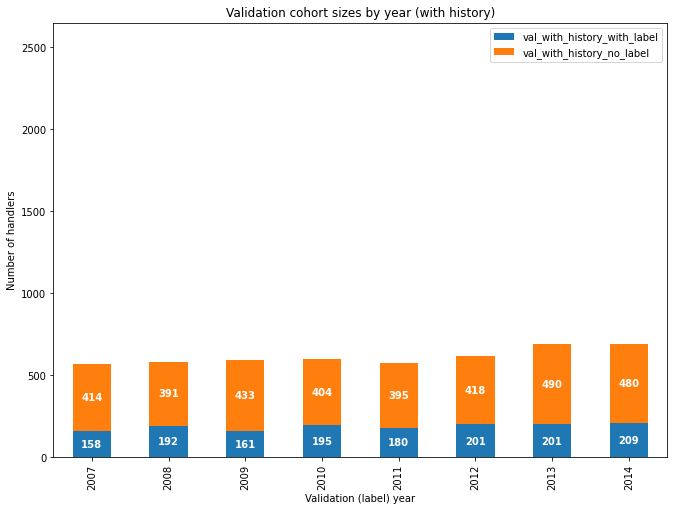

In [6]:
# plot cohort data as stacked bar chart
fig, ax = plt.subplots(figsize=(11,8))
ax.set_title('Validation cohort sizes by year (with history)')
ax.set_ylabel('Number of handlers')
ax.set_xlabel('Validation (label) year')
ax.set_ylim(0, 2650)
cohorts.plot(y=['val_with_history_with_label', 'val_with_history_no_label'], kind='bar', stacked=True, ax=ax)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontweight='bold')
plt.savefig('cohort_wHist.png')

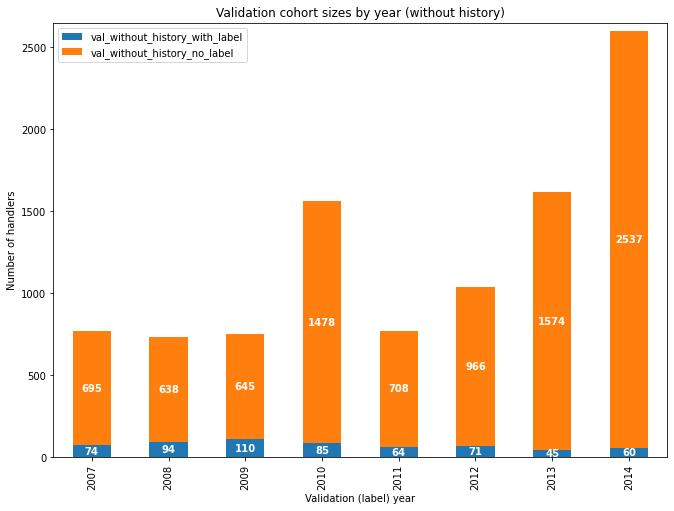

In [7]:
# plot cohort data as stacked bar chart
fig, ax = plt.subplots(figsize=(11,8))
ax.set_title('Validation cohort sizes by year (without history)')
ax.set_ylabel('Number of handlers')
ax.set_xlabel('Validation (label) year')
ax.set_ylim(0, 2650)
cohorts.plot(y=['val_without_history_with_label', 'val_without_history_no_label'], kind='bar', stacked=True, ax=ax)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontweight='bold')
plt.savefig('cohort_woHist.png')